# About Dataset
**Overview**

Dive into the Extrovert vs. Introvert Personality Traits Dataset, a rich collection of behavioral and social data designed to explore the spectrum of human personality. This dataset captures key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers studying social behavior, personality prediction, or data preprocessing techniques.

**Context**

Personality traits like extroversion and introversion shape how individuals interact with their social environments. This dataset provides insights into behaviors such as time spent alone, social event attendance, and social media engagement, enabling applications in psychology, sociology, marketing, and machine learning. Whether you're predicting personality types or analyzing social patterns, this dataset is your gateway to uncovering fascinating insights.

# Columns

- Time_spent_Alone: Hours spent alone daily (0–11).
- Stage_fear: Presence of stage fright (Yes/No).
- Social_event_attendance: Frequency of social events (0–10).
- Going_outside: Frequency of going outside (0–7).
- Drained_after_socializing: Feeling drained after socializing (Yes/No).
- Friends_circle_size: Number of close friends (0–15).
- Post_frequency: Social media post frequency (0–10).
- Personality: Target variable (Extrovert/Introvert).*

# Goals
We have data collected from a survey that attempts to surmize how people socialize. We want to expand upon the survey by attempting to to classify if the respondant is introverted or extroverted. Along with the survey we had sociologist observe the individuals and classify them first. This is our test data. We want to expand upon that by creating an algorithm to classify individuals without a sociologist present.

# Data Exploration and Cleaning

Always the first step. Let's dive in!


***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for statistical computations.


## **Import the required libraries**


These are listed from the data cleaning lab.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Reading and understanding our data**


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This final assignment will use a dataset with a couple of metrics concerning social behaviour that will be used to determine if an individual is an extrovert or introver.

Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [5]:
file_path = r"/content/drive/MyDrive/Coursera-ML/personality_dataset.csv"
df = pd.read_csv(file_path)

We can find more information about the features and types using the `info()`  method.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


According to the output above, we have 2900 entries, 0 to 2899, as well as 7 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2900 then there is no missing values for that particular feature. 'Personality' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical and object data types.


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [7]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

Nothing weird with the strings representing the names of the columns. Let's take a look at the object-type columns.

In [8]:
df['Personality'].value_counts()

,count
Personality,
Extrovert,1491
Introvert,1409


In [9]:
df['Drained_after_socializing'].value_counts()

,count
Drained_after_socializing,
No,1441
Yes,1407


In [10]:
df['Stage_fear'].value_counts()

,count
Stage_fear,
No,1417
Yes,1410


Great! Our target column is binary, as are the other two object columns. Let's encode those real quick.

In [11]:
df['Stage_fear'] = df['Stage_fear'].replace({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].replace({'Extrovert': 1, 'Introvert': 0})

In [12]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1


## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Personality'] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Life Expectancy:\n{}".format(len(top_features), top_features))

There are 8 strongly correlated values with Life Expectancy:
Personality                  1.000000
Going_outside                0.747794
Social_event_attendance      0.729417
Post_frequency               0.729287
Friends_circle_size          0.696507
Time_spent_Alone            -0.720312
Stage_fear                  -0.865795
Drained_after_socializing   -0.866737
Name: Personality, dtype: float64


How interesting... schooling has a high correlation with life expectancy - someone should tell the US government! Just kiddding (kind of) but it is interesting to note. However, there can be underlying factors that actually CAUSE higher education and life expectancy.

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


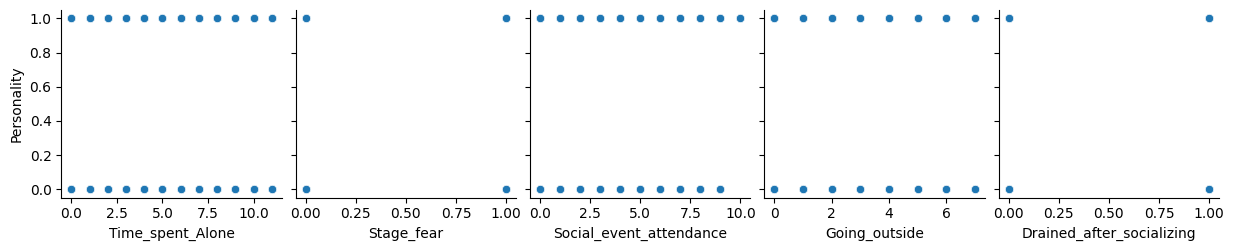

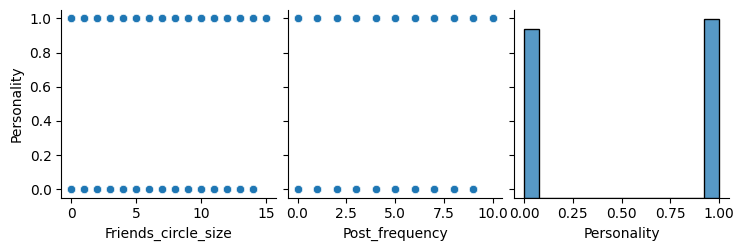

In [14]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Personality'])

Let's check out the standard pairplot.

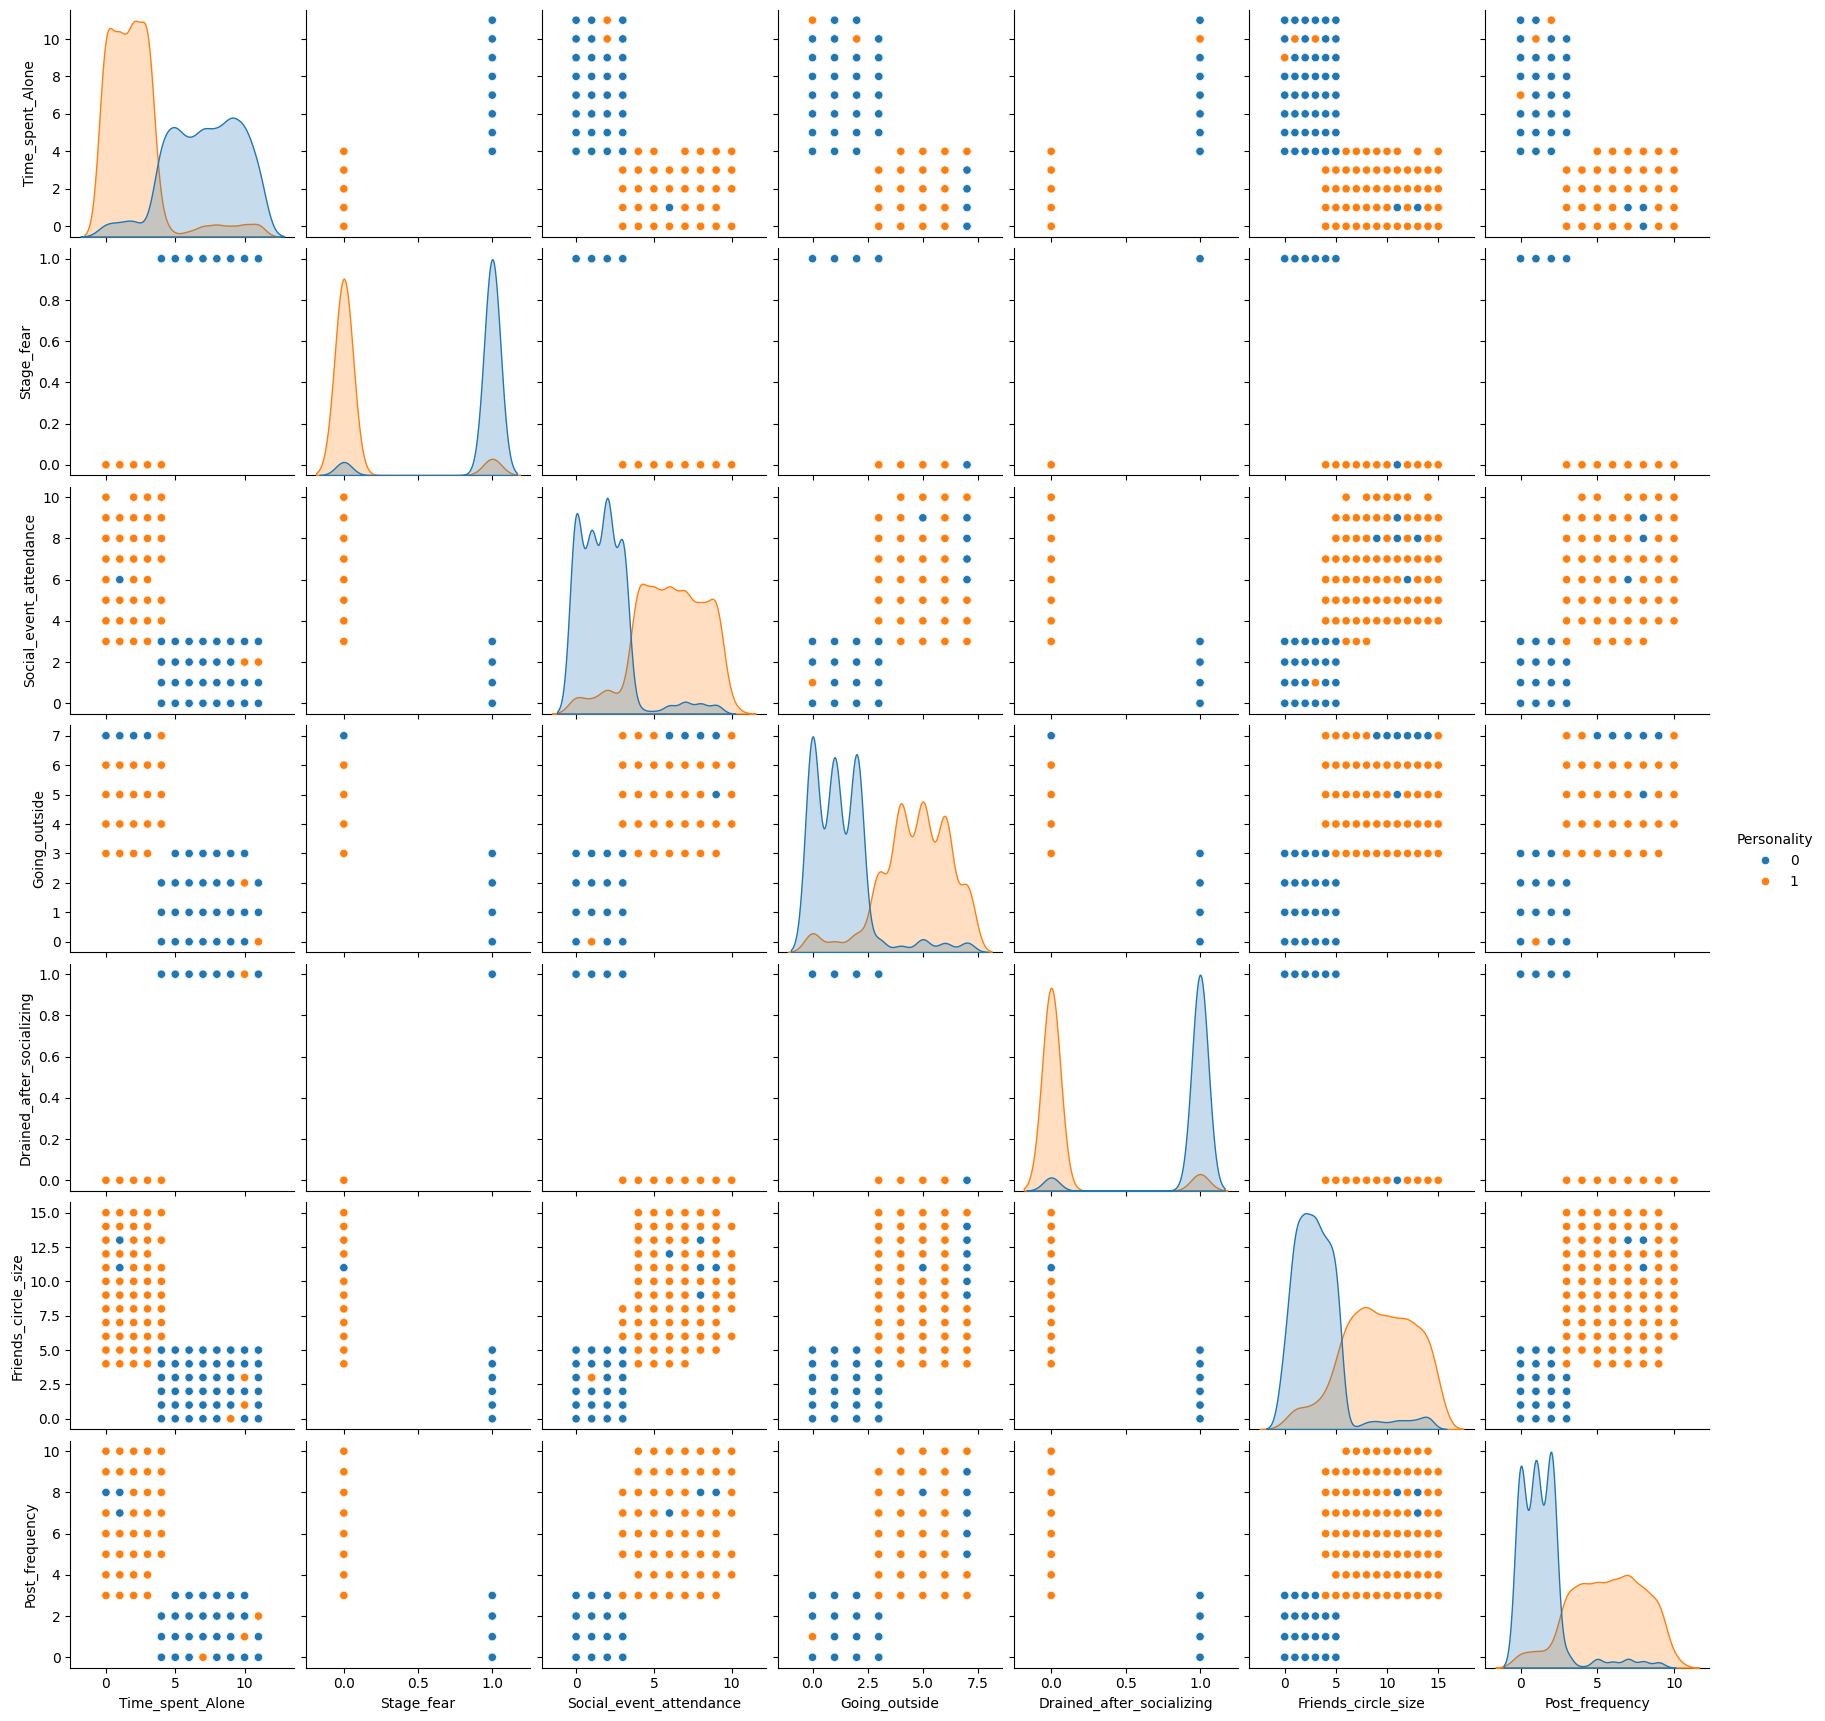

In [15]:
sns.pairplot(data=df, hue='Personality')

Very interesting. The distributions make me think that decision trees will do well for this task.

### Finding the Missing Values


For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


Text(0.5, 1.0, 'Total Missing Values')

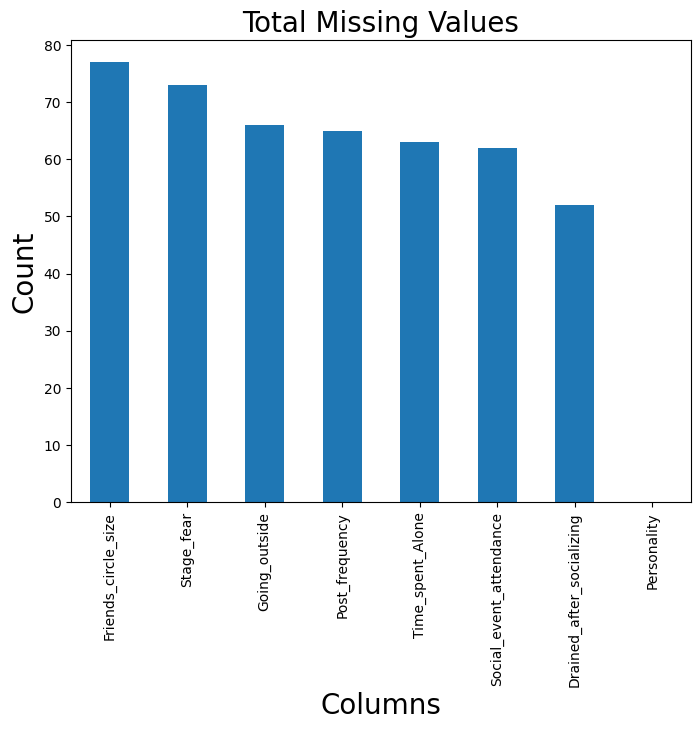

In [16]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

There are several options for dealing with missing values. We will use 'Friends_circle_size' feature to analyze for missing values.


1. We can drop the missing values, using `dropna()` method.


In [17]:
new_df = df.dropna(subset=["Friends_circle_size"])
new_df.shape

(2823, 8)

Text(0.5, 1.0, 'Total Missing Values')

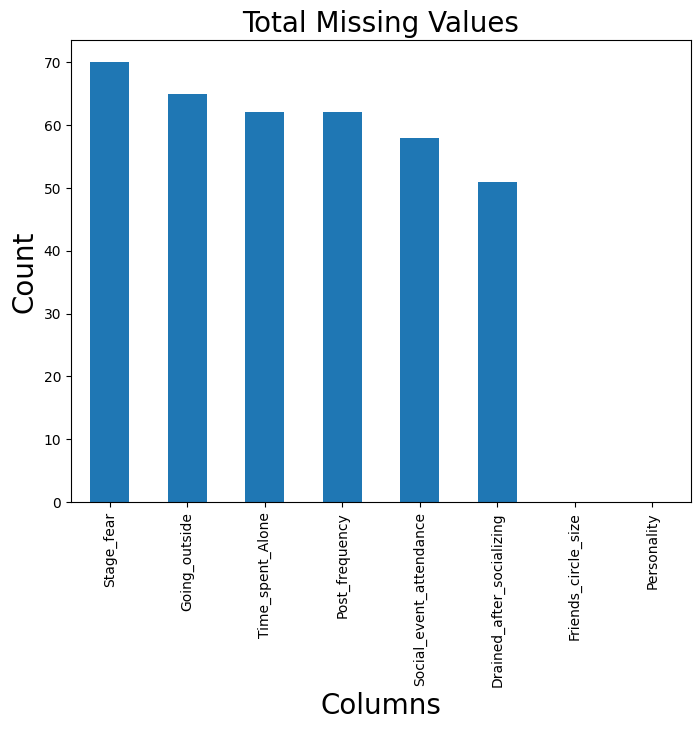

In [18]:
total = new_df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [19]:
new_df2 = new_df.dropna(subset=["Stage_fear"])
new_df2.shape

(2753, 8)

Text(0.5, 1.0, 'Total Missing Values')

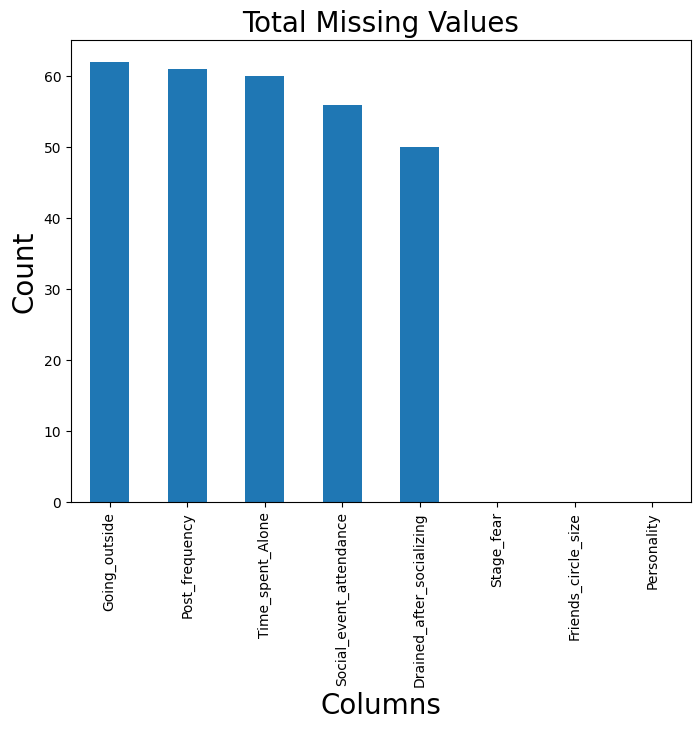

In [20]:
total = new_df2.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

Let's just drop all columns containg NA. We will still have enought to work with.


In [21]:
data_df = new_df2.dropna(axis=0)
data_df.shape

(2477, 8)

## **Feature Scaling**


Do we need to feature scale? Are the values ordinal or nominal? Let's think of the algorithms before we start doing anything else with the data.



# Split the data

In [22]:
from sklearn.model_selection import train_test_split

# Alternatively, we could stratify the categories in the split, as was done previously
feature_columns = [x for x in data_df.columns if x != 'Personality']

X_train, X_test, y_train, y_test = train_test_split(data_df[feature_columns], data_df['Personality'],
                 test_size=0.3, random_state=42)

# Simple Classifications

## Logistic Regression

Often for logistic regression it is a good idea to scale your data. Let's see how the algorithm does with and without it.

In [23]:
# Create a Standard Scaler object
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [24]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.fit_transform(X_test)

In [25]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000
# random state
rs = 123

In [26]:
# Define a logistic regression model with above arguments
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
l2_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter=max_iter)

In [27]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=123)

In [28]:
l2_preds = l2_model.predict(X_test)

In [29]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [30]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

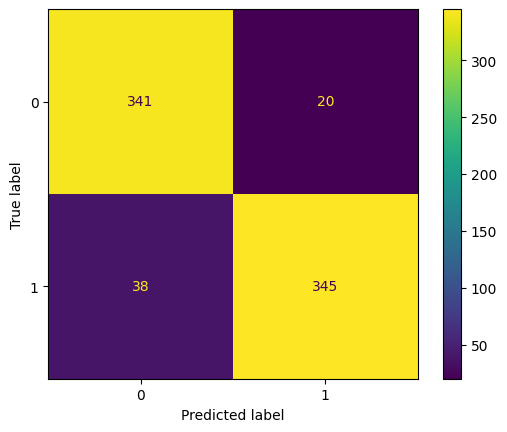

In [31]:
cm = confusion_matrix(y_test, l2_preds, labels=l2_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=l2_model.classes_)
disp.plot()

In [80]:
keys = X_train.columns.to_list()
values = list(l2_model.coef_.reshape(7,))
coeffs = dict(zip(keys, values))
print(coeffs)

{'Time_spent_Alone': np.float64(1.5906920576255463), 'Stage_fear': np.float64(-3.8768143182159), 'Social_event_attendance': np.float64(-0.5727199033166711), 'Going_outside': np.float64(-1.2808426945434674), 'Drained_after_socializing': np.float64(-3.8768143182158754), 'Friends_circle_size': np.float64(-1.319641790050874), 'Post_frequency': np.float64(-0.2842335400789317)}


In [32]:
# Let's try it with the standard scaled values
l2_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter=max_iter)
l2_model.fit(X_train_s, y_train)
l2_preds = l2_model.predict(X_test_s)
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

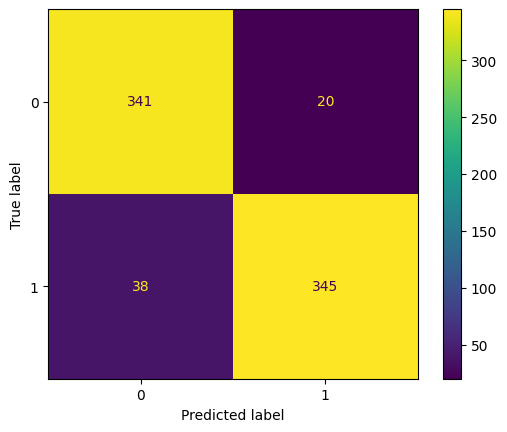

In [33]:
cm = confusion_matrix(y_test, l2_preds, labels=l2_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=l2_model.classes_)
disp.plot()

In [34]:
# Let's try it with the min/max scaled values
l2_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter=max_iter)
l2_model.fit(X_train_mm, y_train)
l2_preds = l2_model.predict(X_test_mm)
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

No change at all with the scaling

In [35]:
# L1 penalty to shrink coefficients with possible removal of coefficients
penalty= 'l1'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter = 1000)

In [36]:
# Fit the regression and get the predictions
l1_model.fit(X_train, y_train)
l1_preds = l1_model.predict(X_test)

In [37]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

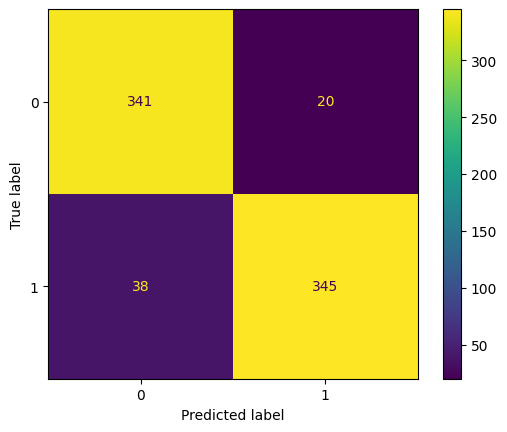

In [38]:
cm = confusion_matrix(y_test, l1_preds, labels=l1_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=l1_model.classes_)
disp.plot()

L1 and L2 penalties have exactly the same metrics - and it did quite well! If the other models don't perform significantly better it may be the best choice due to simplicity.

# Support Vectors

Let's start with the vanilla version

In [39]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [40]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

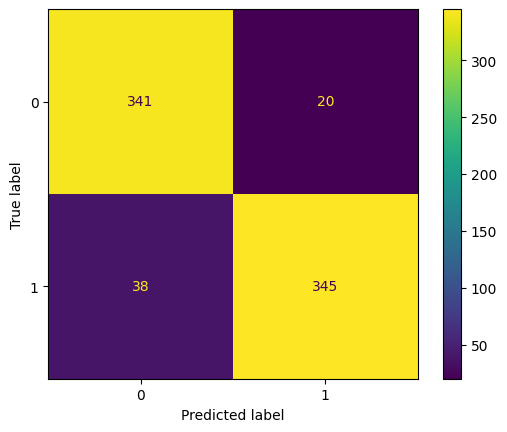

In [41]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [42]:
# With scaled values
model = SVC()
model.fit(X_train_s, y_train.values.ravel())
preds = model.predict(X_test_s)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

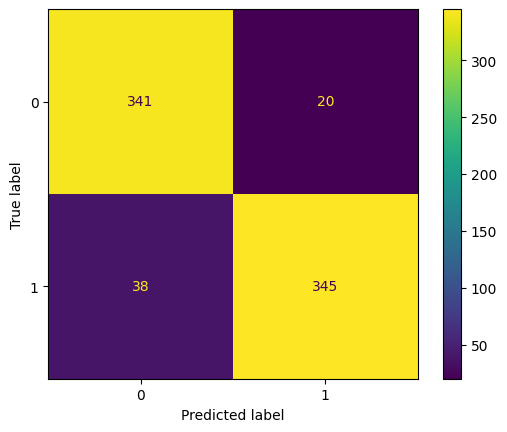

In [43]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

This performs well, but let's check if any kernel methods do better.

In [44]:
from sklearn.model_selection import GridSearchCV
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
model = SVC()
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model,
                           param_grid = params_grid,
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'C': 1, 'kernel': 'rbf'}

In [45]:
model = SVC(C=1, kernel='rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

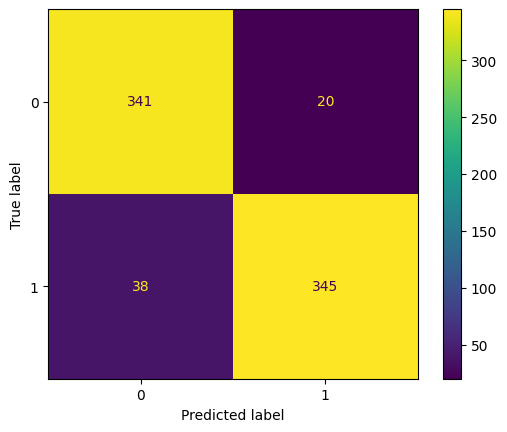

In [46]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

# K-Nearest-Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
neighbors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [49]:
results = []
for n in neighbors:
  print(f"Neighbors: {str(n)}")
  knn_model = KNeighborsClassifier(n_neighbors=n)
  knn_model.fit(X_train_s, y_train.values.ravel())
  preds = knn_model.predict(X_test_s)
  res = evaluate_metrics(y_test, preds)
  results.append(res)
  print(res)
  print("-----------------")

Neighbors: 2
{'accuracy': 0.8709677419354839, 'recall': array([0.95290859, 0.79373368]), 'precision': array([0.81323877, 0.9470405 ]), 'f1score': array([0.87755102, 0.86363636])}
-----------------
Neighbors: 3
{'accuracy': 0.896505376344086, 'recall': array([0.91135734, 0.88250653]), 'precision': array([0.87967914, 0.91351351]), 'f1score': array([0.8952381 , 0.89774236])}
-----------------
Neighbors: 4
{'accuracy': 0.9032258064516129, 'recall': array([0.94736842, 0.8616188 ]), 'precision': array([0.86582278, 0.94555874]), 'f1score': array([0.9047619 , 0.90163934])}
-----------------
Neighbors: 5
{'accuracy': 0.918010752688172, 'recall': array([0.94459834, 0.89295039]), 'precision': array([0.89267016, 0.94475138]), 'f1score': array([0.9179004 , 0.91812081])}
-----------------
Neighbors: 6
{'accuracy': 0.9193548387096774, 'recall': array([0.94736842, 0.89295039]), 'precision': array([0.89295039, 0.94736842]), 'f1score': array([0.91935484, 0.91935484])}
-----------------
Neighbors: 7
{'ac

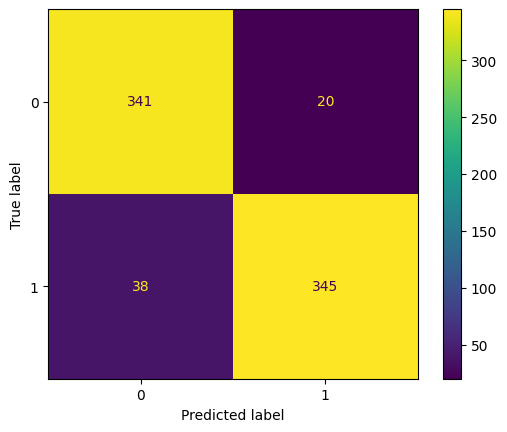

In [50]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_s, y_train.values.ravel())
preds = knn_model.predict(X_test_s)
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

Looks like the optimal neighbors is 10. We have simiar metric values to our logistic regression and support vector models.

## Decision Trees and Random Forest

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

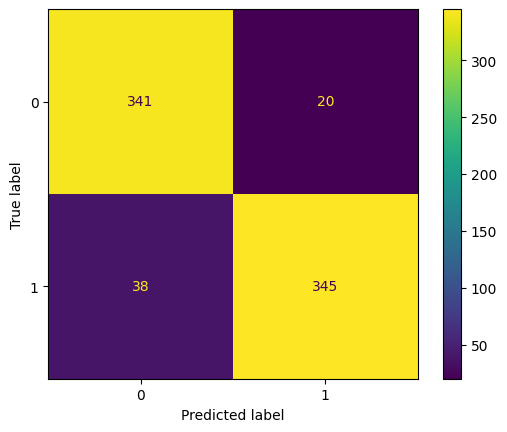

In [53]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

Interesting! The decision tree has the same metrics as SVC. Let's see if changing depth does anything.

In [64]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 2, random_state=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9220430107526881,
 'recall': array([0.94459834, 0.90078329]),
 'precision': array([0.89973615, 0.94520548]),
 'f1score': array([0.92162162, 0.92245989])}

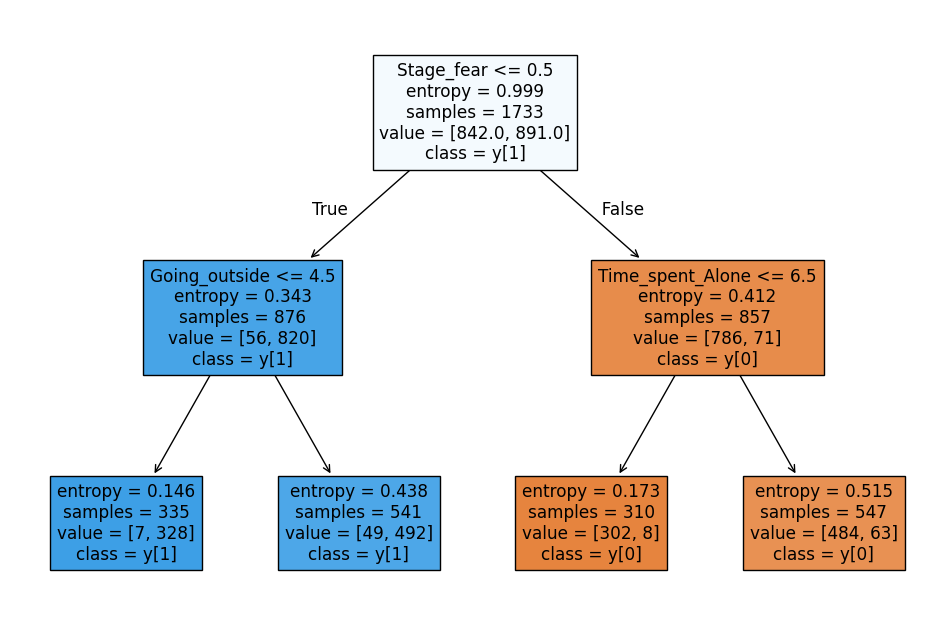

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_test.columns.to_list(), class_names=True, filled=True)
plt.show()

In [55]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 8, random_state=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9139784946236559,
 'recall': array([0.93628809, 0.89295039]),
 'precision': array([0.89182058, 0.9369863 ]),
 'f1score': array([0.91351351, 0.9144385 ])}

Looks like we can get the same performance with 2 features and we start to overfit past 4. Let's see what the Random Forest outputs for us.

In [56]:
M_features=X_test.shape[1]
max_features=round(np.sqrt(M_features))-1
n_estimators=10
model = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.8991935483870968,
 'recall': array([0.90858726, 0.89033943]),
 'precision': array([0.88648649, 0.91176471]),
 'f1score': array([0.89740082, 0.9009247 ])}

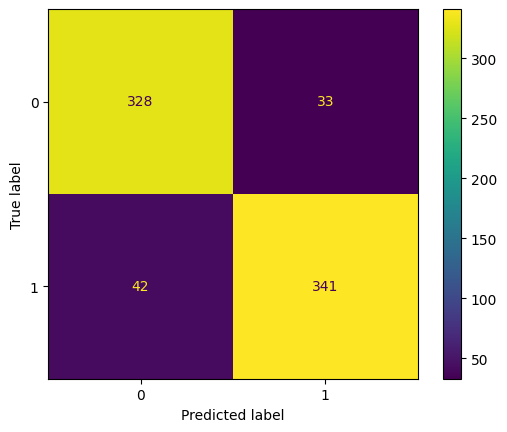

In [57]:
cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

# Findings

Our goal was to create a model that can classifiy someone as an introvert or an extrovert based on their answers to a survey. We explored using Logistic Regression, Support Vector Classifiers, K-Nearest Neighbors, Decision Trees, and Random Forest to achieve this.

Each model ended up achieving the same maximum metrics of:

*   Accuracy: 0.8991935483870968
*   Recall: [0.90858726, 0.89033943]
*   Precision: [0.88648649, 0.91176471]
*   F-1 Score': [0.89740082, 0.9009247 ]

With this in mind I would opt to use the Decision Tree Classifier or Logistic Regression as we can easily determine how these models are making their predictions based on the input features.

We find that the features with the highest predictive power are:

*   Stage Fear
*   Drained After Socializing
*   Time Spent Outside



# Limitations

The scope of the survey is somewhat limited so we may want to expand our questions. Additionally, the classification of introvert vs extrovert isn't necessarily an exact science. There is definitely overlap between the classes and some people describe themselves as introverted extroverts or extroverted introverts. We may want to expand classification to these two additional classes or provided confidence levels for the classifications.